<a href="https://colab.research.google.com/github/Panko44/ErgasiaEpikoinwniaAnthrwpouMhxanhs/blob/main/Ergasia_2_21937%2C_21963%2C_21995.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Μάθημα: Επικοινωνία ανθρώπου-μηχανής***

## **Εργασία #2: Μέθοδοι εξηγήσιμης τεχνητής νοημοσύνης**
<!-- # **2η Εργασία στο μάθημα Επικοινωνία Ανθρώπου Μηχανής 2022/23** -->

*   ## Παναγιώτης Κολλιόπουλος - it21937
*   ## Αθανάσιος Ντελής - it21963
*   ## Βασίλειος Σταύρου - it21995

# 1o μέρος - ‘California Housing’ Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# Load dataset (X:inputs/features, Y:target)
ds_X, ds_Y = fetch_california_housing(return_X_y=True)

# Split features into training/test sets
ds_X_train = ds_X[:-4000]
ds_X_test = ds_X[-4000:]

# Split targets into training/test sets
ds_Y_train = ds_Y[:-4000]
ds_Y_test = ds_Y[-4000:]

# Initialize linear regression object
regr = linear_model.LinearRegression()

# Construct model using the training sets
regr.fit(ds_X_train, ds_Y_train)

# Produce predictions using the test set
ds_Y_pred = regr.predict(ds_X_test)

# Output learned model coefficients
print("Intercept: \n", regr.intercept_)
print("\n Coefficients: \n", regr.coef_)

# Output mean squared prediction error
print("\n Mean square prediction error: %.2f" % mean_squared_error(ds_Y_test, ds_Y_pred))

Intercept: 
 -36.308638344599295

 Coefficients: 
 [ 4.47711234e-01  9.40915756e-03 -1.20802393e-01  7.09551707e-01
 -1.82577993e-06 -8.83342492e-03 -4.21683195e-01 -4.29077083e-01]

 Mean square prediction error: 0.50


## (A) Μετρική R-squared

In [ ]:
#------------------------------------------------------TEST -----------------------------------------------------------------------------
#calculate R-squared of regression model
r_squared = regr.score(ds_X_train, ds_Y_train)

#view R-squared value
print("\n R-squared score: ", r_squared)

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, ds_X, ds_Y,
    return_estimator=True, n_jobs=2)

score = cv_results["test_score"]
print(f"\n R-squared score: {score.mean():.3f} ± {score.std():.3f}")


 R-squared score:  0.5838970805149897

 R-squared score: 0.553 ± 0.062


Η R-squared του μοντέλου είναι 0.55.

Αυτό σημαίνει οτι το 0.55 των διάφορων μέσων τιμών αγορών κατοικίας για διάφορες τοποθεσίες της περιοχής ‘Καλιφόρνια’ στις Η.Π.Α μπορεί να ερμηνευθεί απο τα υπόλοιπα χαρακτηριστικά του μοντέλου.

Το εξηγήγισμο μοντέλο δεν προσεγγίζει πλήρως ικανοποιητικά τη συμπεριφορά του μοντέλου του μαύρου κουτιού καθώς η τιμή του βρίσκεται ανάμεσα στο διάστημα [0,1].

## (B) Γράφημα Επιδράσεων - Effect Plot

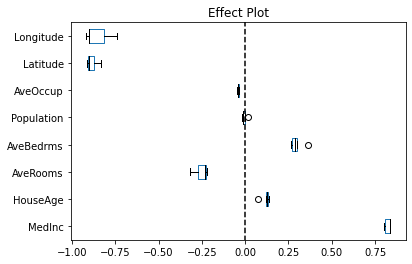

In [ ]:
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=california_housing.feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")

_ = plt.title("Effect Plot")

Γράφημα επιδράσεων (effect plot):
Απεικονίζει πόσο ο συνδυασμός βάρους και χαρακτηριστικού συμβάλλει στις προβλέψεις.

Κάθε μοναδικό κουτί συνοψίζει ένα μοναδικό χαρακτηριστικό.

Οι υπολογιζόμενες επιδράσεις αναπαριστάνται με γραφήματα 'κουτιών'.

Η κάθετη διακεκομμένη γραμμή είναι η μεσαία (median) τιμή της επίδρασης.

Οι 'τελείες' είναι οι ακραίες τιμές.


Παρατηρούμε ότι τα χαρακτηριστικά με τη μεγαλύτερη συνεισφορά στο μοντέλο μας είναι τα latitude, longitude, averooms και medinc.

Παρατηρούμε ότι μεγάλη διακύμανση στη συμπεριφορά του χαρακτηριστικού στην πρόβλεψη έχουν τα χαρακτηριστικά latitude, longitude και averooms.

## (C) Προσδιορισμός εξήγησης πρόβλεψης για ένα τυχαία επιλεγμένο δείγμα από το ‘ds_X_test’

In [ ]:
pd.DataFrame(ds_X_test)

,0,1,2,3,4,5,6,7
0,1.9647,23.0,4.093220,1.031780,1380.0,2.923729,35.29,-120.66
1,1.7031,16.0,3.500770,0.969183,1689.0,2.602465,35.29,-120.66
2,0.7025,19.0,2.425197,1.125984,1799.0,2.833071,35.30,-120.67
3,1.0298,20.0,2.398467,0.812261,3574.0,13.693487,35.32,-120.65
4,6.3144,28.0,6.921191,1.036778,1469.0,2.572680,35.28,-120.62
...,...,...,...,...,...,...,...,...
3995,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
3996,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
3997,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
3998,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Το δείγμα που επιλέγουμε από το σύνολο ‘ds_X_test’ είναι το πρώτο (στην θέση 0 του πίνακα).

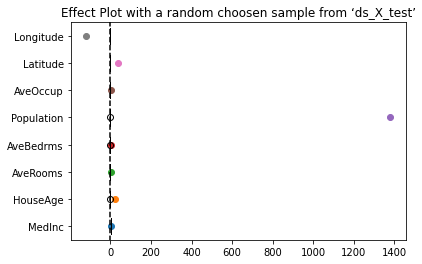

In [ ]:
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names
)

# plt.plot(ds_X_test[0], color='w', marker='*', markeredgecolor='k')
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color, widths = 0.6)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")

for x in range(0, 8):
  plt.scatter(ds_X_test[0][x], x+1)

_ = plt.title("Effect Plot with a random choosen sample from ‘ds_X_test’")

#2o μέρος - ‘Diabetes’ Dataset

In [ ]:
#Import SHAP and XGBoost method libraries
!pip install shap
import xgboost
import shap

#Import diabetes dataset
ds_X, ds_Y = shap.datasets.diabetes()

#Train an XGBoost regression model
model = xgboost.XGBRegressor().fit(ds_X, ds_Y)

#Estimate the SHAP values for each dataset sample
explainer = shap.Explainer(model)
shap_values = explainer(ds_X)

#Define the index of the examined sample for generating local explanations
sample_indx=0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 5.9 MB/s eta 0:00:00
[13:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## (D) Γράφημα Τιμών Shapley

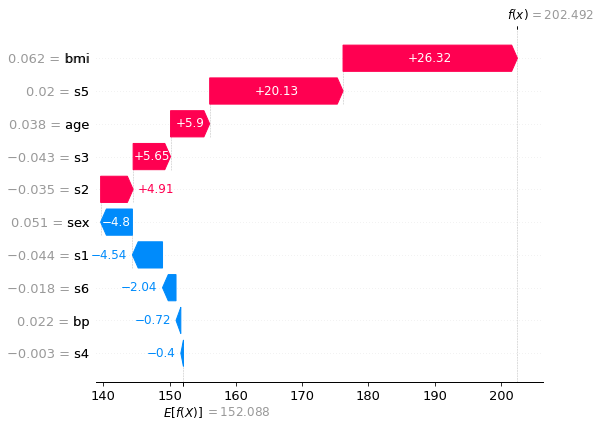

In [ ]:
#Visualize sample SHAP values for given example (local explanation)
shap.plots.waterfall(shap_values[sample_indx])

f(x) = Πιθανότητα Πρόβλεψης εξεταζόμενου δείγματος = 202,492

E[f(x)] = Μέση Πρόβλεψη στο σύνολο δεδομένων = 152,088

Διαφορά απο τη Μέση Πρόβλεψη = f(x) - E[f(x)] = 202,492 - 152,088 = 50,404

Χαρακτηριστικό με την μεγαλύτερη συνεισφορά είναι το BMI.

Το άθροισμα των συνεισφορών ισούται με την υπολογιζόμενη διαφορά(50,41)
[ 26,32 + 20,13 + 5,9 + 5,65 + 4,91 − 4,8 − 4,54 − 2,04 − 0,72 − 0,4 = 50,41 ]

Υπολογιζόμενες τιμές Shapley είναι οι: 140, 150, 160, 170, 180, 190, 200

## (E) Γράφημα Δύναμης

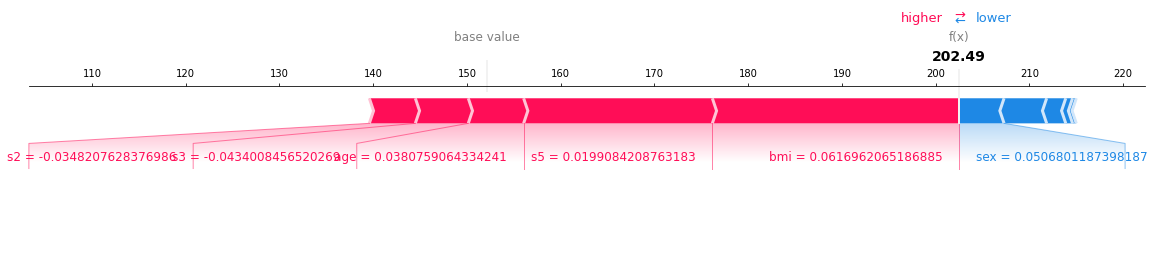

Base Value:  152.13348416289594


In [ ]:
#Visualize (SHAP-based) sample force plot for given example (local explanation)
shap.initjs()
shap.plots.force(shap_values[sample_indx], matplotlib=True)

print("Base Value: ", ds_Y.mean())

Χαρακτηριστικά που αυξάνουν τη πρόβλεψη σε σχέση με τη μέση πρόβλεψη είναι τα:

*   s2(λιποπρωτεΐνες χαμηλής πυκνότητας)
*   s3(λιποπρωτεΐνες υψηλής πυκνότητας)
*   age
*   s5(πιθανώς ημερολόγιο επιπέδων τριγλυκεριδίων ορού)
*   bmi


Χαρακτηριστικά που μειώνουν τη πρόβλεψη είναι μόνο το sex.


f(x)=Συνολική Πρόβλεψη Δείγματος=202,49


Μέση Πρόβλεψη = Base Value = 152,13


Base Value είναι η τιμή που θα είχε πρροβλέψει το μοντέλο εάν δεν γνωρίζαμε κανένα χαρακτηρισρικό για το αποτέλεσμα που βγήκε.

## (F) Γράφημα Περίληψης

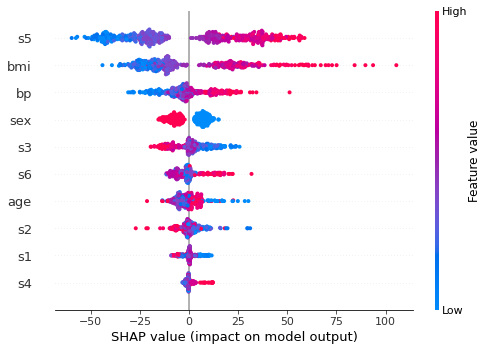

In [ ]:
#Visualize (SHAP-based) summary plot of the effects of all features for all dataset samples (global explanation)
shap.initjs()
shap.plots.beeswarm(shap_values)

Ιεραρχιμένα εξεταζόμενα χαρακτηριστικά:

*   s5 (πιθανώς ημερολόγιο επιπέδων τριγλυκεριδίων ορού)
*   bmi
*   bp
*   sex
*   s3 (λιποπρωτεΐνες υψηλής πυκνότητας)
*   s6 (επίπεδο σακχάρου στο αίμα)
*   age
*   s2 (λιποπρωτεΐνες χαμηλής πυκνότητας)
*   s1 (συνολική χοληστερόλη ορού)
*   s4 (συνολική χοληστερόλη)


Τιμές Shapley: -50, -25, 0, 25, 50, 75, 100


Θερμά χρώματα -> Υψηλές τιμές χαρακτηριστικών

Ψυχρά χρώματα -> Χαμηλές τιμές χαρακτηριστικών

.

Για παράδειγμα,

Παρατηρούμε ότι χαμηλή τιμή bmi μειώνει τον κίνδυνο διαβήτη, ενώ υψηλή τον αυξάνει.

Παρατηρούμε οτι χαμηλή τιμή hdl(s3) αυξάνει τον κίνδυνο διαβήτη, ενώ υψηλή τον μειώνει.

## (G) Γράφημα Μέσης Απόλυτης Τιμής

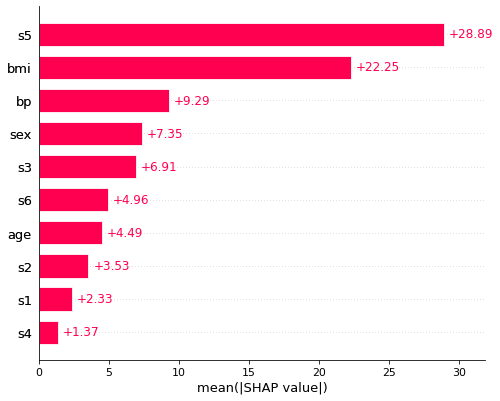

In [ ]:
#Visualize mean absolute value of SHAP values for each feature for all dataset samples (global explanation)
shap.initjs()
shap.plots.bar(shap_values)

Ιεραρχιμένα εξεταζόμενα χαρακτηριστικά απο την υψηλότερη προς τη χαμηλότερη επίδραση στην πρόβλεψη:

*   s5 (πιθανώς ημερολόγιο επιπέδων τριγλυκεριδίων ορού)
*   bmi
*   bp
*   sex
*   s3 (λιποπρωτεΐνες υψηλής πυκνότητας)
*   s6 (επίπεδο σακχάρου στο αίμα)
*   age
*   s2 (λιποπρωτεΐνες χαμηλής πυκνότητας)
*   s1 (συνολική χοληστερόλη ορού)
*   s4 (συνολική χοληστερόλη)

.

Για το s5 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 28,89 (0.2889%)

Για το bmi έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 22,25 (0.2225%)

Για το bp έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 9,29 (0.0929%)

Για το sex έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 7,35 (0.0735%)

Για το s3 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 6,91 (0.0691%)

Για το s6 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 4,96 (0.0496%)

Για το age έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 4,49 (0.0449%)

Για το s2 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 3,53 (0.0353%)

Για το s1 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 2,33 (0.0233%)

Για το s4 έχουμε αύξηση της μέσης απόλυτης τιμής πρόβλεψης κατά 1,37 (0.0137%)


## (H) Διαδραστικό Γράφημα Δύναμης για το σύνολο των δειγμάτων

In [ ]:
#Visualize interactive (SHAP-based) force plot for all samples in the dataset (global explanation)
shap.initjs()
shap.plots.force(shap_values)

Η ταξινόμηση των δειγμάτων γίνεται στον οριζόντιο άξονα με βάση την ομοιότητα.


Οι κόκκινες SHAP τιμές αυξάνουν την πιθανότητα εμφάνισης διαβήτη, ενώ οι μπλέ τιμές την μειώνουν.

Μια ομάδα δειγμάτων που σχηματίζεται και ξεχωρίζει είναι στα αριστερά με μια υψηλή πιθανότητα εμφάνισης διαβήτη και άλλη μια ομάδα δειγμάτων είναι στα δεξιά(συσσωρευμένο μπλέ) με μια χαμηλή πιθανότητα εμφάνισης διαβήτη.